# **Experiment - 3**

## **Creating CNN Models from Scratch, Compiling of CNN Models, Training and Testing, Plotting of Curves**

‎
‎
‎
‎
‎
‎
‎ ‎
‎

‎











**Importing Necessary libraries**

* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural NEtwrok models such as Sequential.
* We are going to use Adam as a optimizer
* Keras layers such as Dense, Flatten, Conv2D and MaxPooling is used to implement the CNN model

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
import numpy as np
from tensorflow.keras import models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input

#**Loading the training and testing data and defining the basic parameters**
* We are resizing the input image to 64 * 64

* In the dataset :
    Training Set : 70%
    Validation Set : 20%
    Test Set : 10%

In [ ]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        'C://Users//abhia//Downloads//plant_village (1)//plant_village/t/rain',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/workspace/Bootcamp/Data/plant_village/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/workspace/Bootcamp/Data/plant_village/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


**Visualization of few images**

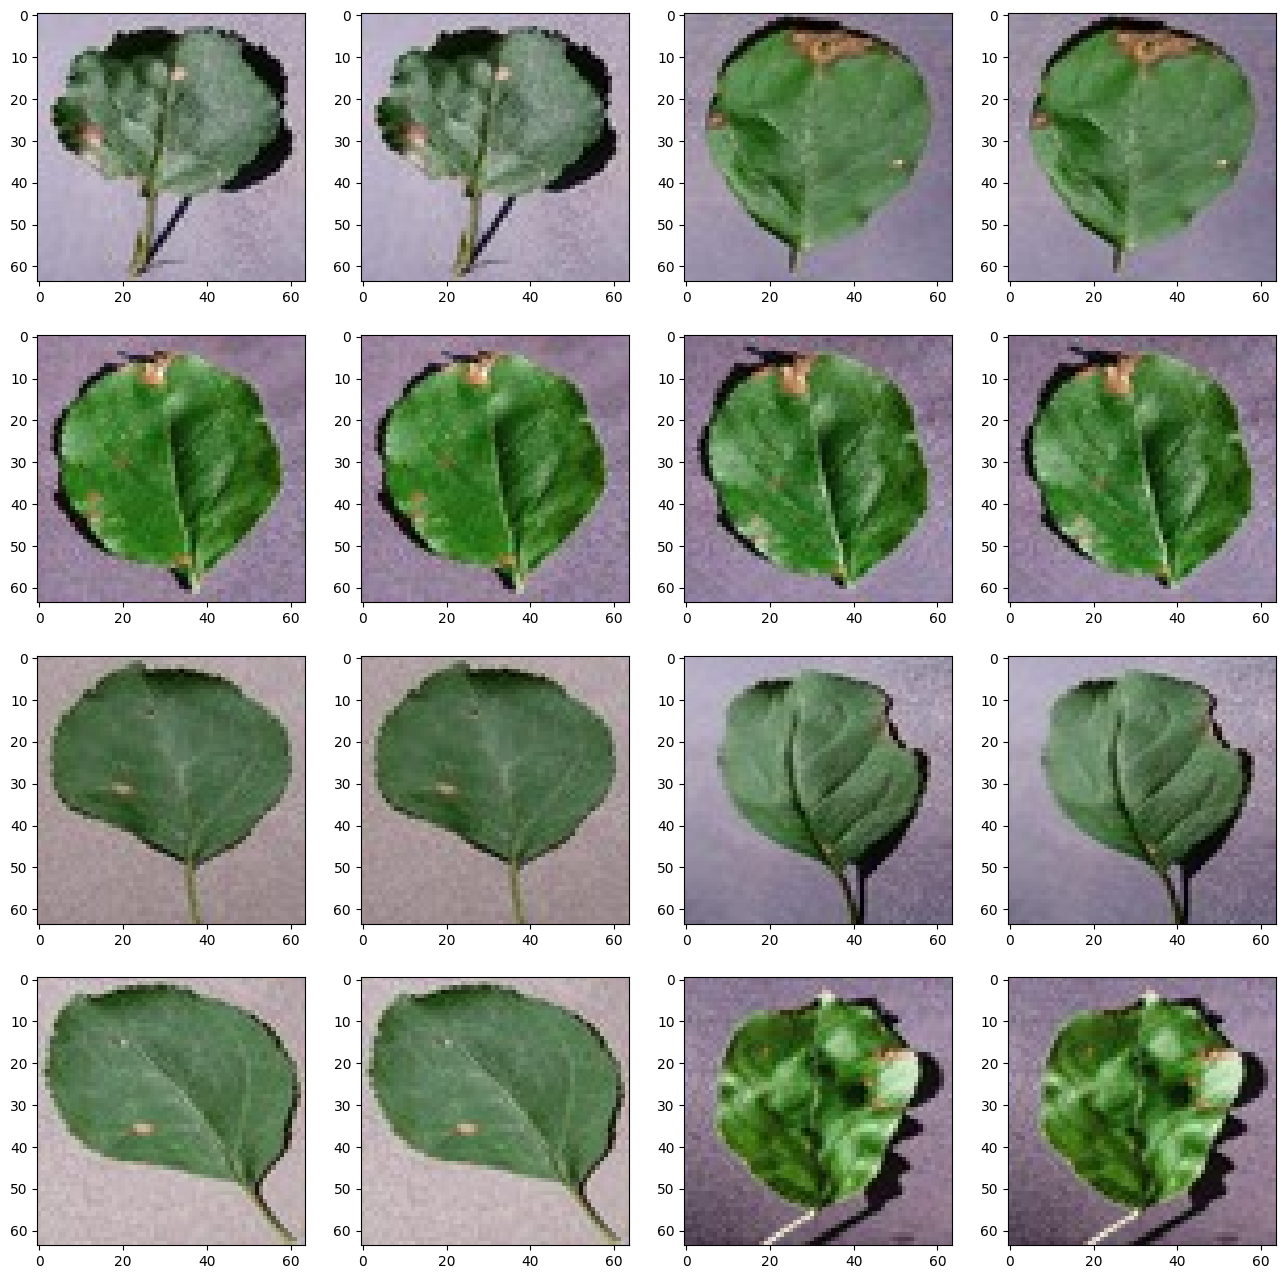

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  # print(img.shape)
  # print(label)
  plt.imshow(img[0])
plt.show()

In [ ]:
img, label = test_generator.next()
img[0].shape

(64, 64, 3)


# **Model Definition**

* We are going to use 2 convolution layers with 3*3 filer and relu as an activation function
* Then max pooling layer with 2*2 filter is used
* After that we are going to use Flatten layer
* Then Dense layer is used with relu function
* In the output layer softmax function is used with 4 neurons as we have four class dataset.
* model.summary() is used to check the overall architecture of the model with number of learnable parameters in each
* Padding is Valid.
* Stride


In [ ]:
# Create the model
model = models.Sequential()
# Add new layers
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

**Compiling and Training the Model**

In [ ]:
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=2)

Epoch 1/30
Epoch 1/30
188/187 - 2s - loss: 0.0354 - acc: 0.9893 - val_loss: 0.2115 - val_acc: 0.9402
Epoch 2/30
Epoch 1/30
188/187 - 2s - loss: 0.0313 - acc: 0.9890 - val_loss: 0.2183 - val_acc: 0.9339
Epoch 3/30
Epoch 1/30
188/187 - 2s - loss: 0.0292 - acc: 0.9903 - val_loss: 0.2038 - val_acc: 0.9465
Epoch 4/30
Epoch 1/30
188/187 - 2s - loss: 0.0314 - acc: 0.9907 - val_loss: 0.2843 - val_acc: 0.9181
Epoch 5/30
Epoch 1/30
188/187 - 2s - loss: 0.0213 - acc: 0.9940 - val_loss: 0.3160 - val_acc: 0.9181
Epoch 6/30
Epoch 1/30
188/187 - 2s - loss: 0.0276 - acc: 0.9923 - val_loss: 0.2019 - val_acc: 0.9449
Epoch 7/30
Epoch 1/30
188/187 - 2s - loss: 0.0184 - acc: 0.9960 - val_loss: 0.2326 - val_acc: 0.9307
Epoch 8/30
Epoch 1/30
188/187 - 2s - loss: 0.0161 - acc: 0.9970 - val_loss: 0.2079 - val_acc: 0.9386
Epoch 9/30
Epoch 1/30
188/187 - 2s - loss: 0.0145 - acc: 0.9980 - val_loss: 0.2025 - val_acc: 0.9465
Epoch 10/30
Epoch 1/30
188/187 - 2s - loss: 0.0180 - acc: 0.9953 - val_loss: 0.2236 - val_a

**Saving the model**

In [ ]:
model.save("CONV_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


**Loading the model**

In [ ]:
model = models.load_model('CONV_plant_deseas.h5')

**Visualization of Accuracy and Loss Curves**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

**Prediction**

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


546/546 [==============================] - 1s 1ms/step
No of errors = 38/546


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

93.04029304029304

**Confusion Matrix**

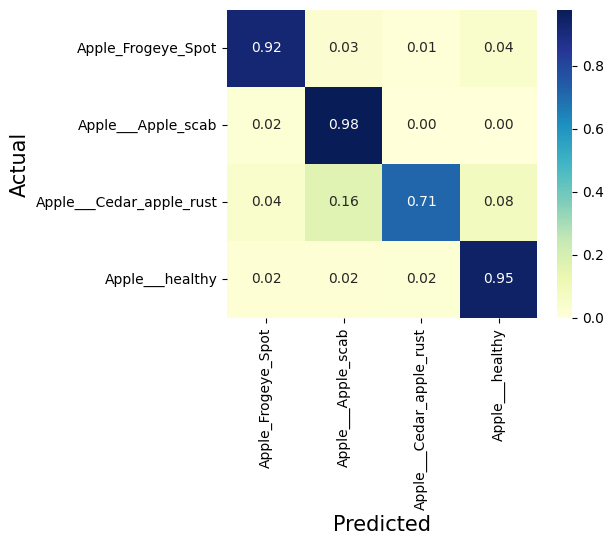

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.91      0.92      0.92       103
      Apple___Apple_scab       0.90      0.98      0.94       134
Apple___Cedar_apple_rust       0.85      0.71      0.78        49
         Apple___healthy       0.97      0.95      0.96       260

                accuracy                           0.93       546
               macro avg       0.91      0.89      0.90       546
            weighted avg       0.93      0.93      0.93       546

